## MODELO PREDICTIVO DE COSTOS DE SINIESTROS DE SALUD.

In [10]:
from google.colab import files
uploaded = files.upload()

Saving ML INSURANCE - insurance.csv to ML INSURANCE - insurance (1).csv


Cada registro corresponde a un siniestro y, en total, se disponde de 1339 registros o siniestros.
Vemos datos estadisticos 

In [11]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
datos_seguros = pd.read_csv(io.BytesIO(uploaded['ML INSURANCE - insurance.csv']))
datos_seguros.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
datos_seguros['sex'].unique()

array(['female', 'male'], dtype=object)

### vamos a reemplazar con valores númericos, para poder realizar el modelo.

In [13]:
valores_sex = {"sex":  {'female':1, 'male':0}}
datos_seguros.replace(valores_sex, inplace=True)
datos_seguros

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [14]:
datos_seguros['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [15]:
valores_smoker = {"smoker":  {'yes':1, 'no':0}}
datos_seguros.replace(valores_smoker, inplace=True)
datos_seguros

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


### vamos a eliminar la columna "region" no lo vamos a utilizar en el modelo.

In [16]:
datos_seguros = datos_seguros.drop(columns=['region'])
datos_seguros

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830
1334,18,1,31.920,0,0,2205.98080
1335,18,1,36.850,0,0,1629.83350
1336,21,1,25.800,0,0,2007.94500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedd52ee390>,
      dtype=object)

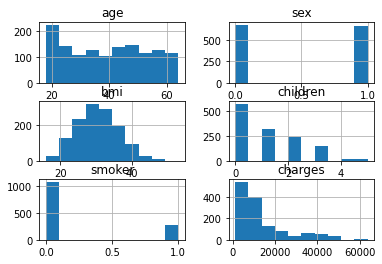

In [17]:
datos_seguros.hist()

In [18]:
datos_seguros[['sex', 'smoker']]

,sex,smoker
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1333,0,0
1334,1,0
1335,1,0
1336,1,0


In [19]:
datos_seguros.groupby("region" ).size()

KeyError: ignored

In [20]:
datos_seguros.groupby("smoker" ).size()

smoker
0    1064
1     274
dtype: int64

In [21]:
datos_seguros.sex.value_counts()

0    676
1    662
Name: sex, dtype: int64

In [22]:
charges = datos_seguros['charges']

###Histograma de los importes de siniestros

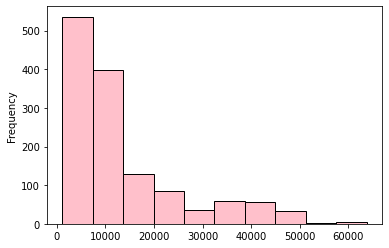

In [23]:
charges.plot.hist(color = 'pink', ec = 'black')

### Distribución Gamma. Esta distribución permite modelizar colas exponenciales, es decir, aquellos en los que la función de densidad alcanza expononencialmente a cero.

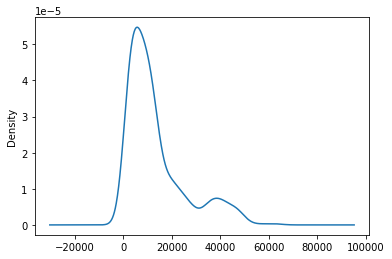

In [24]:
charges.plot.density()

### Gráfica de histograma y curva de densidad

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


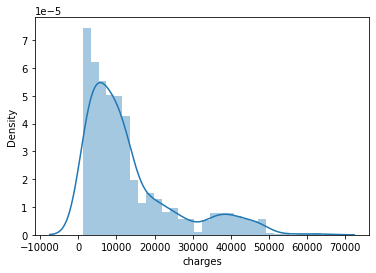

In [25]:
sns.distplot(charges)

In [26]:
bmimayor30 = datos_seguros[(datos_seguros['bmi']>30)]
bmimayor30

,age,sex,bmi,children,smoker,charges
1,18,0,33.77,1,0,1725.55230
2,28,0,33.00,3,0,4449.46200
6,46,1,33.44,1,0,8240.58960
12,23,0,34.40,0,0,1826.84300
13,56,1,39.82,0,0,11090.71780
...,...,...,...,...,...,...
1331,23,1,33.40,0,0,10795.93733
1332,52,1,44.70,3,0,11411.68500
1333,50,0,30.97,3,0,10600.54830
1334,18,1,31.92,0,0,2205.98080


In [27]:
bmimenor30 = datos_seguros[(datos_seguros['bmi']<30)]
bmimenor30

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
5,31,1,25.740,0,0,3756.62160
7,37,1,27.740,3,0,7281.50560
...,...,...,...,...,...,...
1324,31,0,25.935,1,0,4239.89265
1328,23,1,24.225,2,0,22395.74424
1330,57,1,25.740,2,0,12629.16560
1336,21,1,25.800,0,0,2007.94500


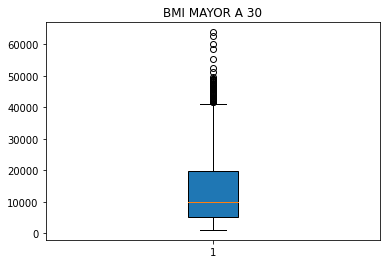

In [28]:
plt.boxplot(bmimayor30 ['charges'],vert=True,patch_artist=True);
plt.title("BMI MAYOR A 30");

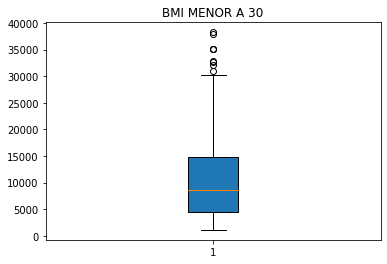

In [29]:
plt.boxplot(bmimenor30 ['charges'],vert=True,patch_artist=True);
plt.title("BMI MENOR A 30");

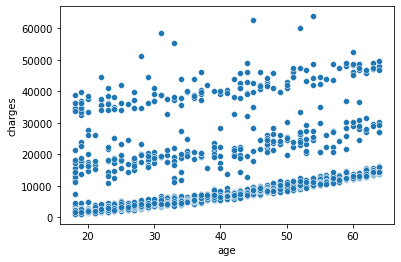

In [30]:
sns.scatterplot(data=datos_seguros, x="age", y="charges")


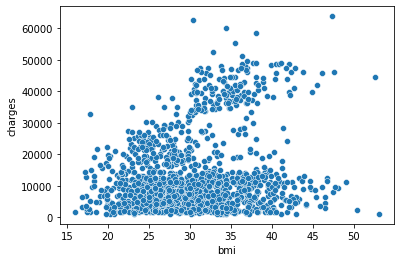

In [31]:
sns.scatterplot(data=datos_seguros, x="bmi", y="charges")

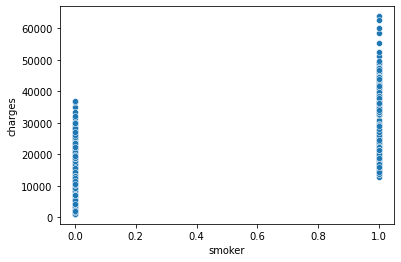

In [32]:
sns.scatterplot(data=datos_seguros, x="smoker", y="charges")

###Fase de Entrenamiendo del Modelo - Vamos a predicir el costo de los siniestros, viendo como las distintas variables afectan a la variable que queremos predecir.

### vamos separar los datos en 2 partes: los datos de entrenamiento en un 80% y por otro lado los datos para el test o validacion el resto de datos que serian el 20%
###datos_test que es igual a datos_seguros menos los datos de entrenamiento.

In [33]:
datos_entrenamiento = datos_seguros.sample(frac=0.8,random_state=0)
datos_test = datos_seguros.drop(datos_entrenamiento.index)

In [34]:
datos_entrenamiento

,age,sex,bmi,children,smoker,charges
578,52,0,30.200,1,0,9724.53000
610,47,1,29.370,1,0,8547.69130
569,48,0,40.565,2,1,45702.02235
1034,61,0,38.380,0,0,12950.07120
198,51,1,18.050,0,0,9644.25250
...,...,...,...,...,...,...
584,19,0,20.700,0,0,1242.81600
147,51,1,37.730,1,0,9877.60770
160,42,1,26.600,0,1,21348.70600
750,37,1,26.400,0,1,19539.24300


In [35]:
datos_test

,age,sex,bmi,children,smoker,charges
11,62,1,26.290,0,1,27808.72510
23,34,1,31.920,1,1,37701.87680
24,37,0,28.025,2,0,6203.90175
25,59,1,27.720,3,0,14001.13380
28,23,0,17.385,1,0,2775.19215
...,...,...,...,...,...,...
1305,24,1,27.720,0,0,2464.61880
1315,18,0,28.310,1,0,11272.33139
1318,35,0,39.710,4,0,19496.71917
1326,42,1,32.870,0,0,7050.02130


###vamos a sacar la variable que queremos predecir.

In [36]:
etiquetas_entrenamiento = datos_entrenamiento.pop('charges')
etiquetas_test = datos_test.pop('charges')

In [37]:
etiquetas_entrenamiento

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
584      1242.81600
147      9877.60770
160     21348.70600
750     19539.24300
859     10965.44600
Name: charges, Length: 1070, dtype: float64

In [38]:
etiquetas_test

11      27808.72510
23      37701.87680
24       6203.90175
25      14001.13380
28       2775.19215
           ...     
1305     2464.61880
1315    11272.33139
1318    19496.71917
1326     7050.02130
1333    10600.54830
Name: charges, Length: 268, dtype: float64

## Vamos a entrenar un modelo de Regresión Lineal Simple.

In [39]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(datos_entrenamiento,etiquetas_entrenamiento)

LinearRegression()

In [40]:
modelo.score(datos_entrenamiento,etiquetas_entrenamiento)

0.7583467120805873

In [41]:
predicciones = modelo.predict(datos_test)
predicciones

array([36503.04150903, 31353.68503081,  7355.75466813, 13581.94606556,
          53.96128653,  4398.04441929, 13226.37210347, 15914.35545358,
        8395.46336062,  8241.42608196, 27539.59619102,  7131.72914193,
       28381.14559894, 12126.74526222, 13515.52279788, 33490.58457632,
       36634.85076007, 11136.26909417, 10145.24605021,  8824.90315374,
       39510.44944513, 32997.31713894, 28103.17598275,  2327.74619811,
       12618.83941367, 12526.82264085,   124.39283305, 33731.43160835,
       27154.43782994,  9587.93632052, 11714.75660934,  3441.70291686,
        4852.7126982 , 35007.06314979,  2261.4574774 ,  9718.29023387,
        6826.99882554,  7139.5720701 ,  3339.0563689 ,  2553.33449058,
        4591.23095669,  7560.8868833 , 12004.35445435,  6538.36102171,
        9681.69813433, 16807.80384651, 11034.43065543, 30250.57133195,
       30817.19998859, 11535.72657181,  4099.96615108, 10175.40298887,
       12138.96872194, -1304.95895627,  6840.33811001, 37192.42151401,
      

In [42]:
datos_test.insert(0, 'severidad', predicciones)

In [43]:
datos_test

,severidad,age,sex,bmi,children,smoker
11,36503.041509,62,1,26.290,0,1
23,31353.685031,34,1,31.920,1,1
24,7355.754668,37,0,28.025,2,0
25,13581.946066,59,1,27.720,3,0
28,53.961287,23,0,17.385,1,0
...,...,...,...,...,...,...
1305,2930.320092,24,1,27.720,0,0
1315,1973.648810,18,0,28.310,1,0
1318,11289.173790,35,0,39.710,4,0
1326,9153.189940,42,1,32.870,0,0


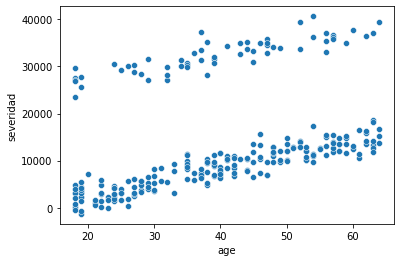

In [51]:

sns.scatterplot( x="age", y= "severidad",data=datos_test,)

In [45]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print("Error porcentual : %f" % (error*100))

Error porcentual : 668198.119067


In [46]:
nuevo_suscriptor = pd.DataFrame(np.array([[23,1,38.5,3,0]]),columns=['age', 'sex','bmi','children','smoker'])
nuevo_suscriptor

,age,sex,bmi,children,smoker
0,23.0,1.0,38.5,3.0,0.0


In [47]:
modelo.predict(nuevo_suscriptor)

array([7360.56210737])

##Regresión Lineal Múltiple

In [49]:
import statsmodels.api as sm
from scipy import stats


X = datos_entrenamiento.iloc[:,[0,1,2,4]]
y = etiquetas_entrenamiento

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     823.9
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          4.94e-324
Time:                        22:50:54   Log-Likelihood:                -10813.
No. Observations:                1070   AIC:                         2.164e+04
Df Residuals:                    1065   BIC:                         2.166e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.111e+04   1056.088    -10.517      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
